In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import defaultdict
from scipy.spatial.distance import cdist
mpl.rcParams['axes.linewidth'] = 1.8
from DEPENDENCIES.recycle import *
from svg2emf import svg2emf

In [2]:
def first_second_moments(x, probdens):
    m1 = np.trapz(x*probdens, x=x)
    m2_1 = np.trapz(x**2*probdens, x=x)
    m2 = np.abs(m2_1-m1**2)**0.5
    print("First +/- second moment: {:.3f} +/- {:.3f}".format(m1, m2))

# HELDIH

In [3]:
g5_heldih = read_text_file("HELDIH/gH-POPC5-46_PRO1_heldih.sfu")
g6_heldih = read_text_file("HELDIH/gH-POPC6-46_PRO1_heldih.sfu")
n15_heldih = read_text_file("HELDIH/NP61-POPC5-46_PRO3_heldih.sfu")
n161_heldih = read_text_file("HELDIH/NP61-POPC6-46_PRO1_heldih1.sfu")
n162_heldih = read_text_file("HELDIH/NP61-POPC6-46_PRO1_heldih2.sfu")

gH with/without cholesterol
First +/- second moment: 94.185 +/- 21.715
First +/- second moment: 88.445 +/- 14.442


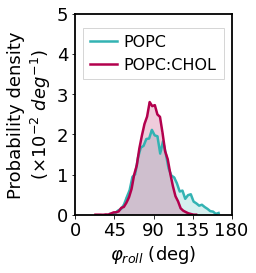

In [15]:
print("gH with/without cholesterol")
fig = plt.figure(figsize=(2.8,3.7))
ax = plt.axes()
ax.tick_params(labelsize=Z)
ax.set_xticks([0,45,90,135,180])
ax.set_xlim(0,180)
ax.set_ylim(0,0.05)#0.06)
ax.set_xlabel(r"$\varphi_{roll}$ (deg)", fontsize=Z)
ax.set_ylabel('Probability density\n'+r'($×10^{-2}$ $deg^{-1}$)', fontsize=Z)
count, bins, p = ax.hist(np.abs(g5_heldih[:,1]), bins=40, alpha=0.2, density=True, color=(0.2,0.7,0.7))
ax.set_yticklabels([0,1,2,3,4,5])
bins = 0.5*(bins[1:]+bins[:-1])
first_second_moments(bins, count)
ax.plot(bins, count, c=(0.2,0.7,0.7), lw=2.5, label="POPC")
count, bins, p = ax.hist(np.abs(g6_heldih[:,1]), bins=40, alpha=0.2, density=True, color=(0.7,0,0.3))
bins = 0.5*(bins[1:]+bins[:-1])
first_second_moments(bins, count)
ax.plot(bins, count, c=(0.7,0,0.3), lw=2.5, label="POPC:CHOL")
ax.legend(fontsize=Z-2, ncol=1, bbox_to_anchor=(0., 0.55, 1, 0.5), loc='center', mode='expand', fancybox=False, handletextpad=0.4, handlelength=1.7)
plt.savefig("Plots/gH-heldih.png", format='png', dpi=300, bbox_inches='tight', transparent=True)
#plt.savefig("Plots/gH-heldih.svg", format='svg', bbox_inches='tight')
#svg2emf("Plots/gH-heldih.svg")
plt.show()
plt.close()

In [5]:
(14.442-21.715)/21.715

-0.3349297720469721

In [6]:
14.442/88.445

0.16328791904573464

NP61 with/without cholesterol (Binding mode 1)


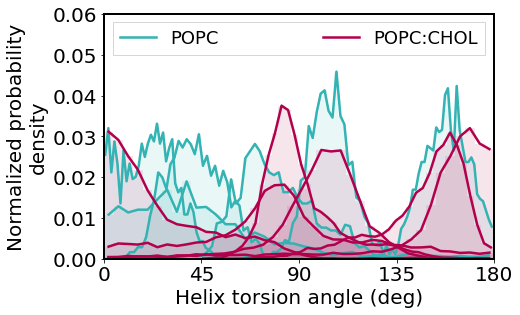

In [7]:
print("NP61 with/without cholesterol (Binding mode 1)")
fig = plt.figure(figsize=(7,4.5))
ax = plt.axes()
ax.tick_params(labelsize=Z)
ax.set_xlim(0,180)
ax.set_xticks([0,45,90,135,180])
ax.set_ylim(0,0.06)
ax.set_xlabel('Helix torsion angle (deg)', fontsize=Z)
ax.set_ylabel('Normalized probability\ndensity', fontsize=Z)

for pep in np.abs(n15_heldih[:,1:].T): #absolute value for the periodicity of the dihedral
    count, bins, p = ax.hist(pep, bins=40, density=True, color=(0.2,0.7,0.7), alpha=0.1)
    bins = 0.5*(bins[1:]+bins[:-1])
    ax.plot(bins, count, lw=2.5, color=(0.2,0.7,0.7))
for pep in np.abs(n161_heldih[:,1:].T):
    count, bins, p = ax.hist(pep, bins=40, density=True, color=(0.7,0,0.3), alpha=0.1)
    bins = 0.5*(bins[1:]+bins[:-1])
    ax.plot(bins, count, lw=2.5, color=(0.7,0,0.3))
ax.plot([],[],lw=2.5, color=(0.2,0.7,0.7), label="POPC")
ax.plot([],[],lw=2.5, color=(0.7,0,0.3), label="POPC:CHOL")
ax.legend(fontsize=Z-2, ncol=2, bbox_to_anchor=(0., 0.65, 1, 0.5), loc='center', mode='expand', fancybox=False)
plt.show()
plt.close()

NP61 with/without cholesterol (Binding mode 2)


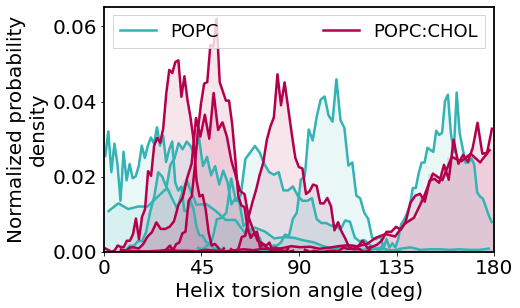

In [16]:
print("NP61 with/without cholesterol (Binding mode 2)")
fig = plt.figure(figsize=(7,4.5))
ax = plt.axes()
ax.tick_params(labelsize=Z)
ax.set_xlim(0,180)
ax.set_xticks([0,45,90,135,180])
#ax.set_ylim(0,0.06)
ax.set_xlabel('Helix torsion angle (deg)', fontsize=Z)
ax.set_ylabel('Normalized probability\ndensity', fontsize=Z)

for pep in np.abs(n15_heldih[:,1:].T): #absolute value for the periodicity of the dihedral
    count, bins, p = ax.hist(pep, bins=40, density=True, color=(0.2,0.7,0.7), alpha=0.1)
    bins = 0.5*(bins[1:]+bins[:-1])
    ax.plot(bins, count, lw=2.5, color=(0.2,0.7,0.7))
for pep in np.abs(n162_heldih[:,1:].T):
    count, bins, p = ax.hist(pep, bins=40, density=True, color=(0.7,0,0.3), alpha=0.1)
    bins = 0.5*(bins[1:]+bins[:-1])
    ax.plot(bins, count, lw=2.5, color=(0.7,0,0.3))
ax.plot([],[],lw=2.5, color=(0.2,0.7,0.7), label="POPC")
ax.plot([],[],lw=2.5, color=(0.7,0,0.3), label="POPC:CHOL")
ax.legend(fontsize=Z-2, ncol=2, bbox_to_anchor=(0., 0.65, 1, 0.5), loc='center', mode='expand', fancybox=False)
plt.savefig('Plots/gHNP_rolling.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('Plots/gHNP_rolling.svg', format='svg', bbox_inches='tight')
#svg2emf('Plots/gHNP_rolling.svg')
plt.show()
plt.close()

# HELDIHCOM

In [117]:
def read_heldihcom(bname, ndxs, excl=[], nread=-1):
    data = [read_text_file("HELDIHCOM/{}{}_heldihcom.sfu".format(bname, ndx))[:nread] for ndx in ndxs.astype('int') if ndx not in excl]
    lens = np.array([len(d) for d in data])
    data = np.array(data)
    data = data[lens == np.max(lens)]
    data = np.array(data)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    return data

In [118]:
g5_1_hdihcom = read_heldihcom("G5_1/gH-POPC5-46-r1_MD", np.linspace(0,53,54), excl=[7,31,23,27,28,41,47], nread=1000)
g5_2_hdihcom = read_heldihcom("G5_2/gH-POPC5-46-r2_MD", np.linspace(0,55,56), excl=[24,35,38], nread=1000)
g6_1_hdihcom = read_heldihcom("G6_1/gH-POPC6-46-r1_MD", np.linspace(0,54,55), excl=[], nread=1000)
g6_2_hdihcom = read_heldihcom("G6_2/gH-POPC6-46-r2_MD", np.linspace(0,53,54), excl=[37,38,41,42], nread=1000)
n15_1_hdihcom = read_heldihcom("N15_1/NP61-POPC5-46-r1_MD", np.linspace(0,53,54), excl=[0,1,2,3,4,9,26])
n15_2_hdihcom = read_heldihcom("N15_2/NP61-POPC5-46-r2_MD", np.linspace(0,53,54), excl=[5,6,10,32,52])
n15_3_hdihcom = read_heldihcom("N15_3/NP61-POPC5-46-r3_MD", np.linspace(0,49,50), excl=[1,30,36])
n15_4_hdihcom = read_heldihcom("N15_4/NP61-POPC5-46-r4_MD", np.linspace(0,49,50), excl=[1,2,7,33,34,43])
n16_1_hdihcom = read_heldihcom("N16_1/NP61-POPC6-46-r1_MD", np.linspace(0,54,55), excl=[0,6,12,18,24,])
n16_2_hdihcom = read_heldihcom("N16_2/NP61-POPC6-46-r2_MD", np.linspace(0,53,54), excl=[2,8,10,18,19,20,21,29,33,38,43])
n16_3_hdihcom = read_heldihcom("N16_3/NP61-POPC6-46-r3_MD", np.linspace(0,49,50), excl=[3,5,15,21,29,33,38,40,43,44,49])
n16_4_hdihcom = read_heldihcom("N16_4/NP61-POPC6-46-r4_MD", np.linspace(0,49,50), excl=[0,7,14,15,18,19,20,25,41,43])

In [119]:
def plot_heldihcom(hdihcom, ncols=3, nlig=6):
    nrows = hdihcom.shape[1]//ncols
    nth = 4
    RADIANS = np.abs(hdihcom[:,nlig:]*np.pi/180) #absolute value for the periodicity of the dihedral
    DZ = hdihcom[:,:nlig]
    ytl = [0,1,2,3,4,5]
    fig = plt.figure(figsize=(ncols*5,nrows*5))
    for i, (radians, dz) in enumerate(zip(RADIANS.T, DZ.T)):
        ax = plt.subplot(nrows,ncols,i+1, projection='polar')
        ax.scatter(radians, dz, s=1, alpha=0.05, color=(0.0,0.5,1.0))
        ax.set_xlim((0,np.pi))
        ax.set_ylim((0,5))
        ax.tick_params(labelsize=Z)
        ax.set_xticks([np.pi/nth*th for th in range(nth+1)])
        ax.set_theta_zero_location("N")
        ax.set_yticks(ytl)
        ax.set_yticklabels(ytl)
        rdns = np.linspace(0,np.pi,100)
        ax.plot(rdns, [2]*len(rdns), ls='-', lw=2.5, c=(0.4,0,0.7))
    plt.show()
    plt.close()

In [120]:
def plot_heldihcom_replicas(hdihcoms, ncols=2, nlig=6):
    nrows = len(hdihcoms)//ncols
    nth = 4
    fig = plt.figure(figsize=(ncols*5, nrows*5))
    for i, hdihcom in enumerate(hdihcoms):
        radians = np.abs(hdihcom[:,nlig:]*np.pi/180).flatten() #absolute value for the periodicity of the dihedral
        dz = hdihcom[:,:nlig].flatten()
        ytl = [0,1,2,3,4,5]
        ax = plt.subplot(nrows,ncols,i+1, projection='polar')
        ax.scatter(radians, dz, s=1, alpha=0.01, color=(0.0,0.5,1.0))
        ax.set_xlim((0,np.pi))
        ax.set_ylim((0,5))
        ax.tick_params(labelsize=Z)
        ax.set_xticks([np.pi/nth*th for th in range(nth+1)])
        ax.set_theta_zero_location("N")
        ax.set_yticks(ytl)
        ax.set_yticklabels(ytl)
        rdns = np.linspace(0,np.pi,100)
        ax.plot(rdns, [2]*len(rdns), ls='-', lw=2.5, c=(0.4,0,0.7))
    plt.show()
    plt.close()

gH in POPC (Replica 1)


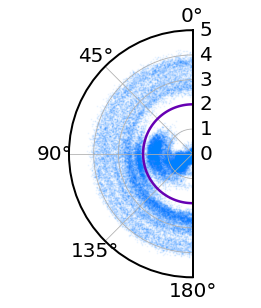

gH in POPC (Replica 2)


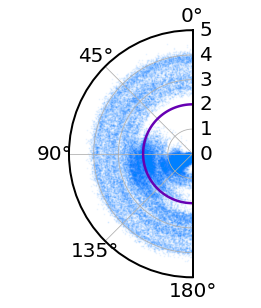

In [122]:
print("gH in POPC (Replica 1)")
plot_heldihcom(g5_1_hdihcom, ncols=1, nlig=1)
print("gH in POPC (Replica 2)")
plot_heldihcom(g5_2_hdihcom, ncols=1, nlig=1)

C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\projections\polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


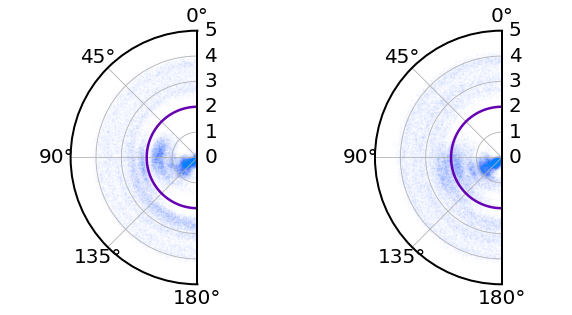

In [123]:
plot_heldihcom_replicas([g5_1_hdihcom, g5_2_hdihcom], ncols=2, nlig=1)

gH in POPC:CHOL (Replica 1)


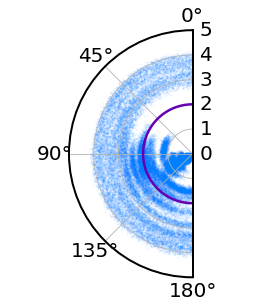

gH in POPC:CHOL (Replica 2)


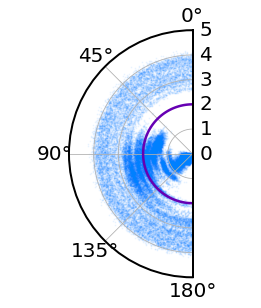

In [124]:
print("gH in POPC:CHOL (Replica 1)")
plot_heldihcom(g6_1_hdihcom, ncols=1, nlig=1)
print("gH in POPC:CHOL (Replica 2)")
plot_heldihcom(g6_2_hdihcom, ncols=1, nlig=1)

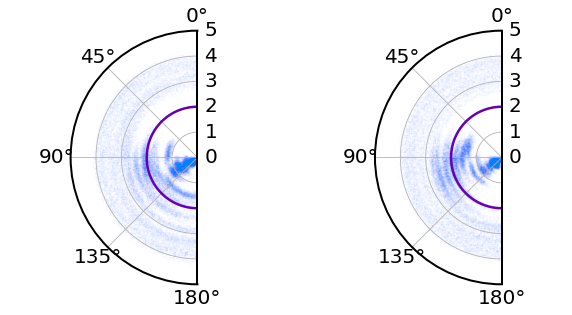

In [125]:
plot_heldihcom_replicas([g6_1_hdihcom, g6_2_hdihcom], ncols=2, nlig=1)

gHNP in POPC (Replica 1)


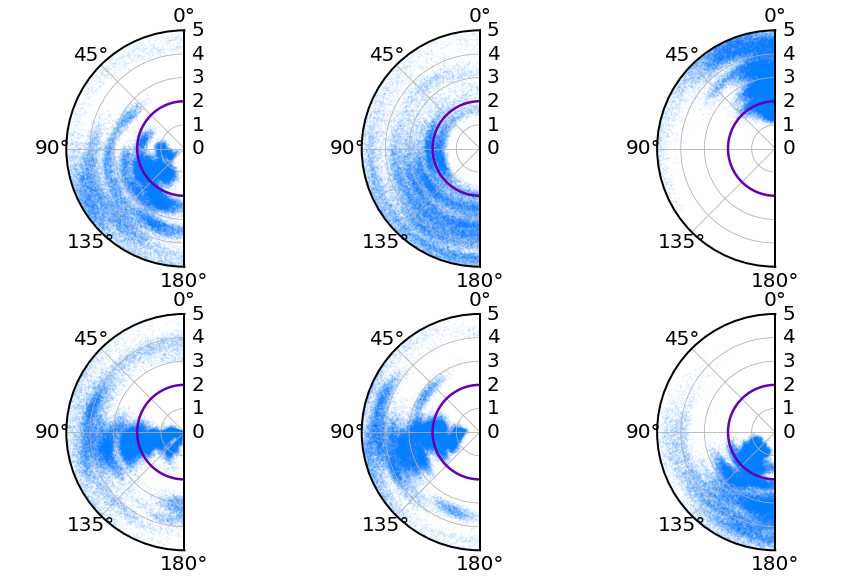

gHNP in POPC (Replica 2)


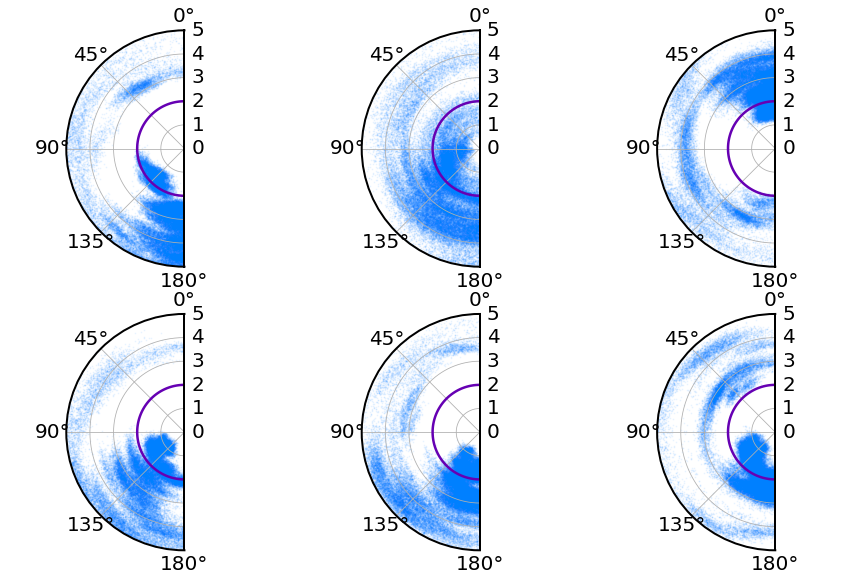

gHNP in POPC (Replica 3)


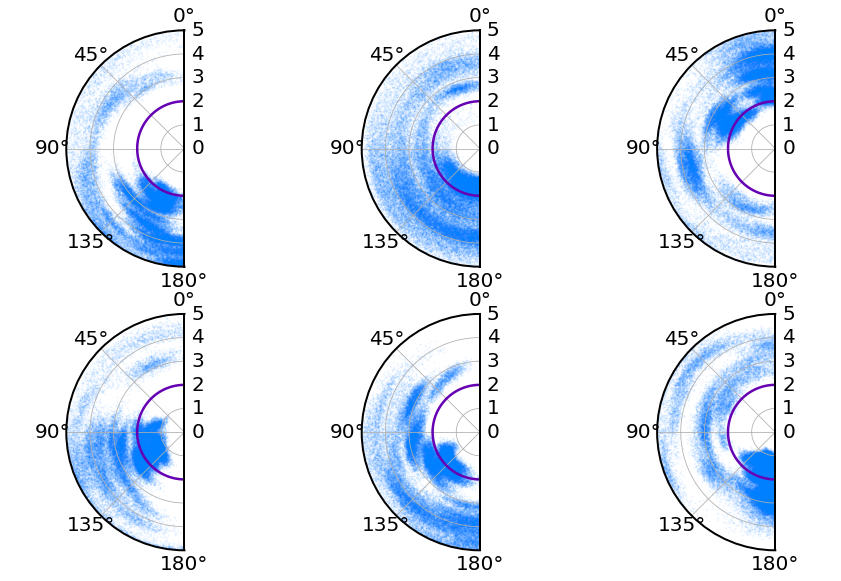

gHNP in POPC (Replica 4)


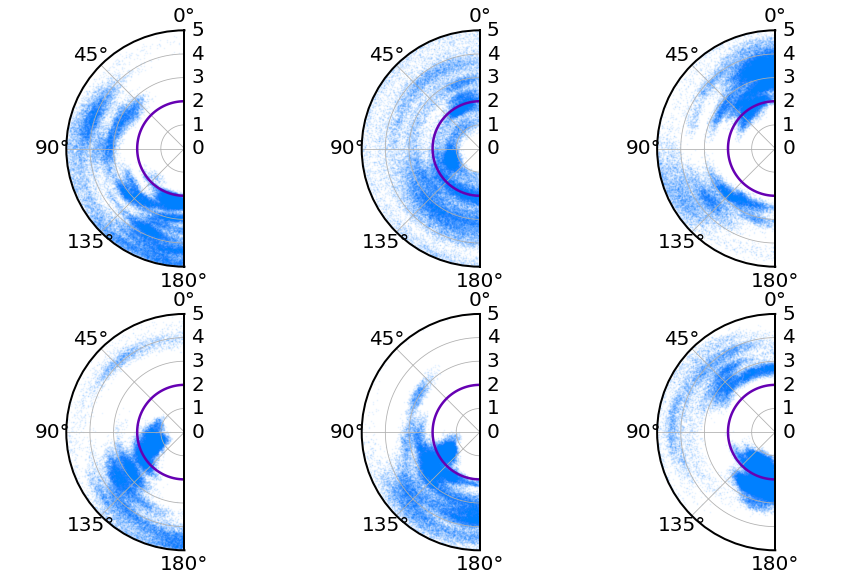

In [75]:
print("gHNP in POPC (Replica 1)")
plot_heldihcom(n15_1_hdihcom)
print("gHNP in POPC (Replica 2)")
plot_heldihcom(n15_2_hdihcom)
print("gHNP in POPC (Replica 3)")
plot_heldihcom(n15_3_hdihcom)
print("gHNP in POPC (Replica 4)")
plot_heldihcom(n15_4_hdihcom)

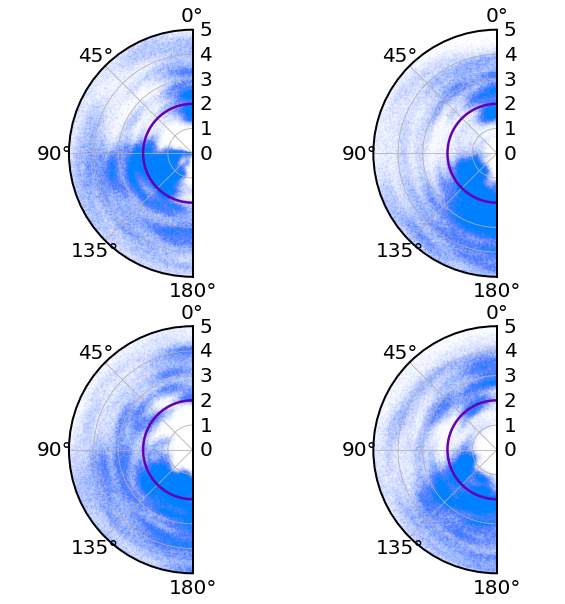

In [76]:
plot_heldihcom_replicas([n15_1_hdihcom, n15_2_hdihcom, n15_3_hdihcom, n15_4_hdihcom])

gHNP in POPC:CHOL (Replica 1)


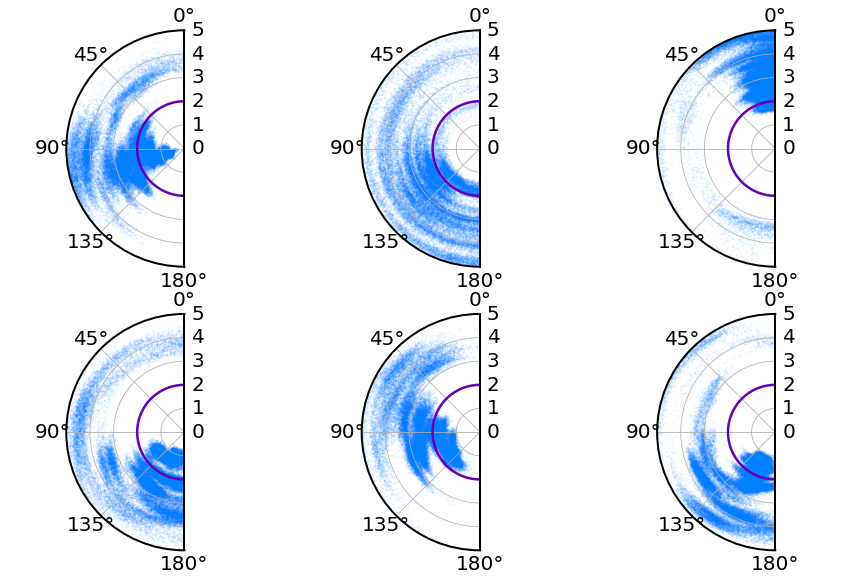

gHNP in POPC:CHOL (Replica 2)


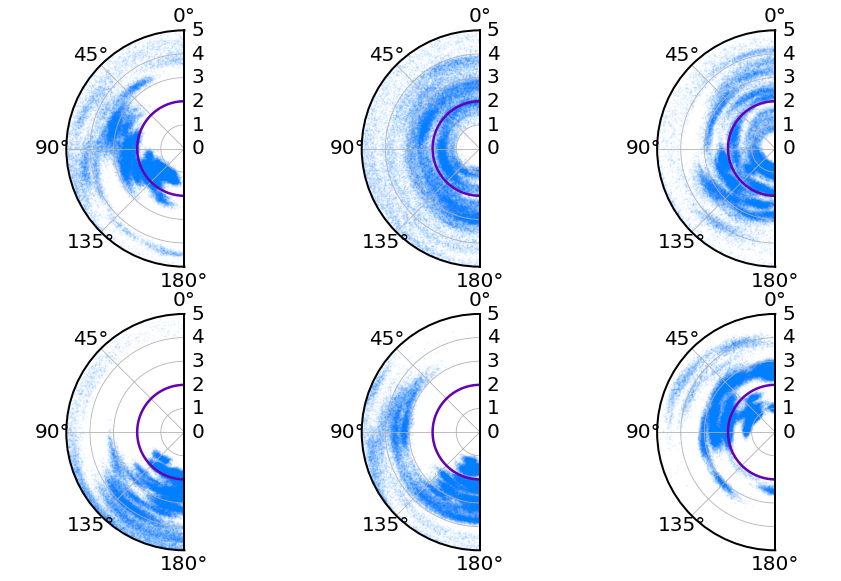

gHNP in POPC:CHOL (Replica 3)


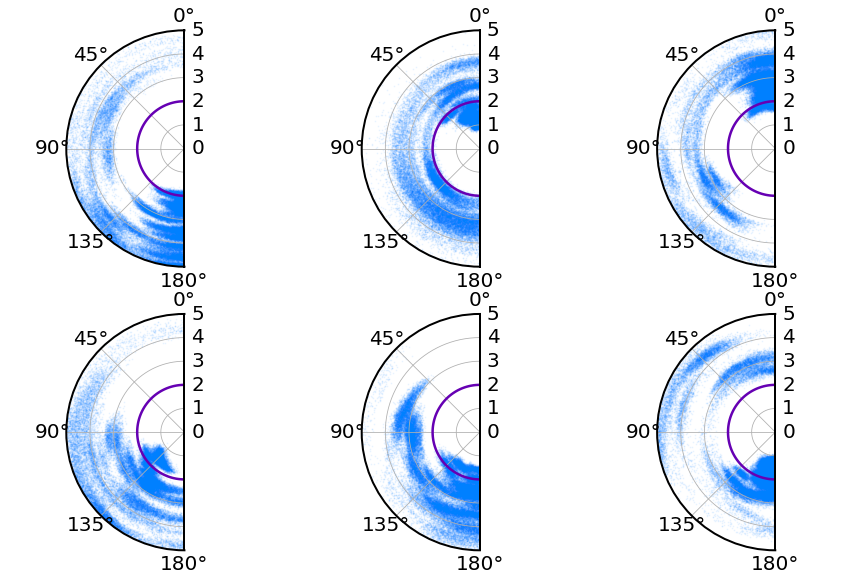

gHNP in POPC:CHOL (Replica 4)


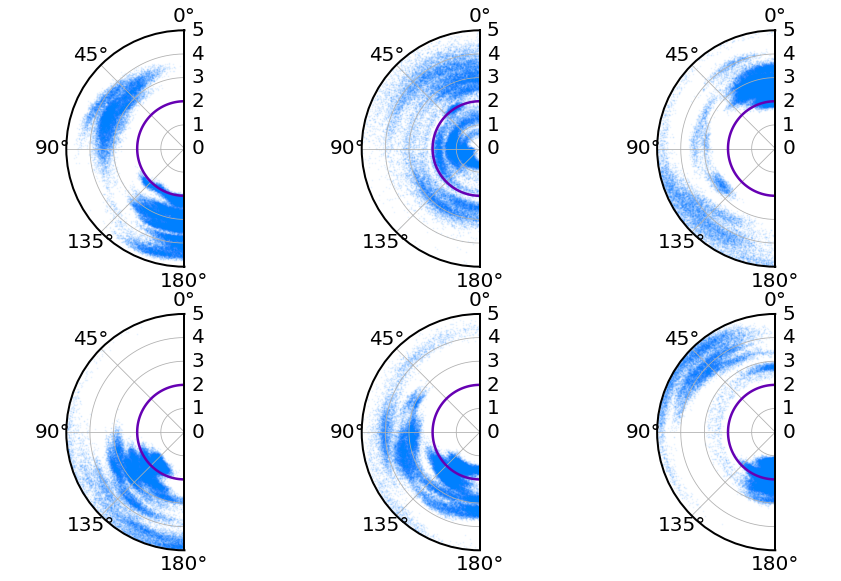

In [77]:
print("gHNP in POPC:CHOL (Replica 1)")
plot_heldihcom(n16_1_hdihcom)
print("gHNP in POPC:CHOL (Replica 2)")
plot_heldihcom(n16_2_hdihcom)
print("gHNP in POPC:CHOL (Replica 3)")
plot_heldihcom(n16_3_hdihcom)
print("gHNP in POPC:CHOL (Replica 4)")
plot_heldihcom(n16_4_hdihcom)

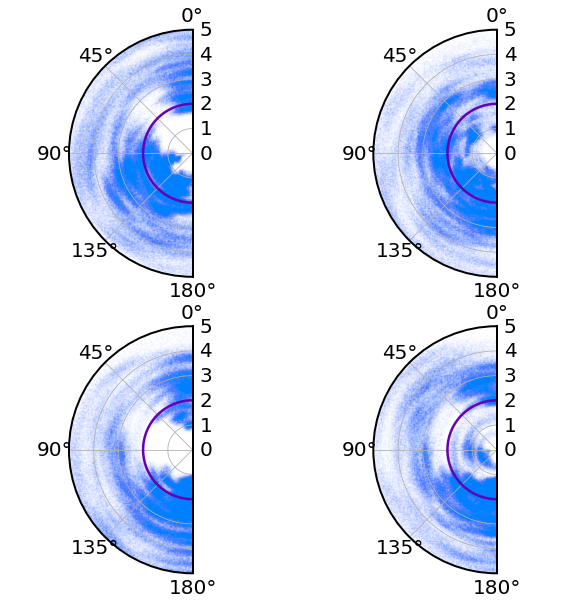

In [78]:
plot_heldihcom_replicas([n16_1_hdihcom, n16_2_hdihcom, n16_3_hdihcom, n16_4_hdihcom])